In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optionnel : joli thème pour les graphes
sns.set(style="whitegrid")

# Chargement des données consolidées depuis le fichier CSV
df = pd.read_csv("cve_consolidated.csv")

# Aperçu rapide
df.head()


,ID du bulletin,Titre du bulletin,Type de bulletin,Date de publication,Lien du bulletin,Identifiant CVE,Description,Score CVSS,Base Severity,Type CWE,Score EPSS,Éditeur/Vendor,Produit,Versions affectées
0,CERTFR-2025-AVI-0392,Multiples vulnérabilités dans Mattermost Serve...,avis,"Tue, 13 May 2025 00:00:00 +0000",https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,CVE-2025-4128,"Mattermost versions 10.5.x <= 10.5.4, 9.11.x <...",3.1,LOW,CWE-863,0.00021,Mattermost,Mattermost,"10.5.0, 9.11.0"
1,CERTFR-2025-AVI-0392,Multiples vulnérabilités dans Mattermost Serve...,avis,"Tue, 13 May 2025 00:00:00 +0000",https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,CVE-2025-4573,"Mattermost versions 10.7.x <= 10.7.1, 10.6.x <...",4.1,MEDIUM,CWE-90,0.00022,Mattermost,Mattermost,"10.7.0, 10.6.0, 10.5.0, 9.11.0"
2,CERTFR-2025-AVI-0396,Multiples vulnérabilités dans les produits SAP...,avis,"Tue, 13 May 2025 00:00:00 +0000",https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,CVE-2025-43003,SAP S/4 HANA allows an authenticated attacker ...,6.4,MEDIUM,CWE-749,0.00053,SAP_SE,SAP S/4HANA (Private Cloud & On-Premise),"S4CRM 204, 205, 206, S4CEXT 107, 108, BBPCRM 7..."
3,CERTFR-2025-AVI-0396,Multiples vulnérabilités dans les produits SAP...,avis,"Tue, 13 May 2025 00:00:00 +0000",https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,CVE-2025-43007,SAP Service Parts Management (SPM) does not pe...,6.3,MEDIUM,CWE-862,0.00044,SAP_SE,SAP Service Parts Management (SPM),"SAP_APPL 617, 618, S4CORE 100, 101, 102, 103"
4,CERTFR-2025-AVI-0396,Multiples vulnérabilités dans les produits SAP...,avis,"Tue, 13 May 2025 00:00:00 +0000",https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,CVE-2025-23191,Cached values belonging to the SAP OData endpo...,3.1,LOW,CWE-644,0.00050,SAP_SE,SAP Fiori for SAP ERP,"SAP_GWFND 740, 750, 751, 752, 753, 754, 755, 7..."


In [6]:
# Affichage d'informations générales sur les colonnes et les types de données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3819 entries, 0 to 3818
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID du bulletin       3819 non-null   object 
 1   Titre du bulletin    3819 non-null   object 
 2   Type de bulletin     3819 non-null   object 
 3   Date de publication  3819 non-null   object 
 4   Lien du bulletin     3819 non-null   object 
 5   Identifiant CVE      3819 non-null   object 
 6   Description          3819 non-null   object 
 7   Score CVSS           1509 non-null   float64
 8   Base Severity        3819 non-null   object 
 9   Type CWE             3819 non-null   object 
 10  Score EPSS           3787 non-null   float64
 11  Éditeur/Vendor       3738 non-null   object 
 12  Produit              3755 non-null   object 
 13  Versions affectées   3752 non-null   object 
dtypes: float64(2), object(12)
memory usage: 417.8+ KB


In [4]:
print("\n--- Top 10 des éditeurs ---")
print(df["Éditeur/Vendor"].value_counts().head(10))

print("\n--- Top 10 des produits ---")
print(df["Produit"].value_counts().head(10))

print("\n--- Top 10 des CWE ---")
print(df["Type CWE"].value_counts().head(10))

print("\n--- Répartition des sévérités ---")
print(df["Base Severity"].value_counts())



--- Top 10 des éditeurs ---
Éditeur/Vendor
Linux                 1442
Microsoft             1058
Red Hat                543
Siemens                164
Inconnu                 48
Moxa                    48
SAP_SE                  42
Fortinet                37
Ivanti                  32
Palo Alto Networks      24
Name: count, dtype: int64

--- Top 10 des produits ---
Produit
Linux                                             1439
Red Hat OpenShift Container Platform 4             175
Inconnu                                             48
Windows Server 2022                                 45
Red Hat Enterprise Linux 9                          45
Windows 10 Version 1809                             44
Windows Server 2019                                 44
Windows Server 2019 (Server Core installation)      44
Windows Server 2016 (Server Core installation)      42
Windows Server 2016                                 42
Name: count, dtype: int64

--- Top 10 des CWE ---
Type CWE
Non disponible

C:\Users\diaby\AppData\Local\Temp\ipykernel_27656\495702094.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vendors.values, y=top_vendors.index, palette="Blues_d")


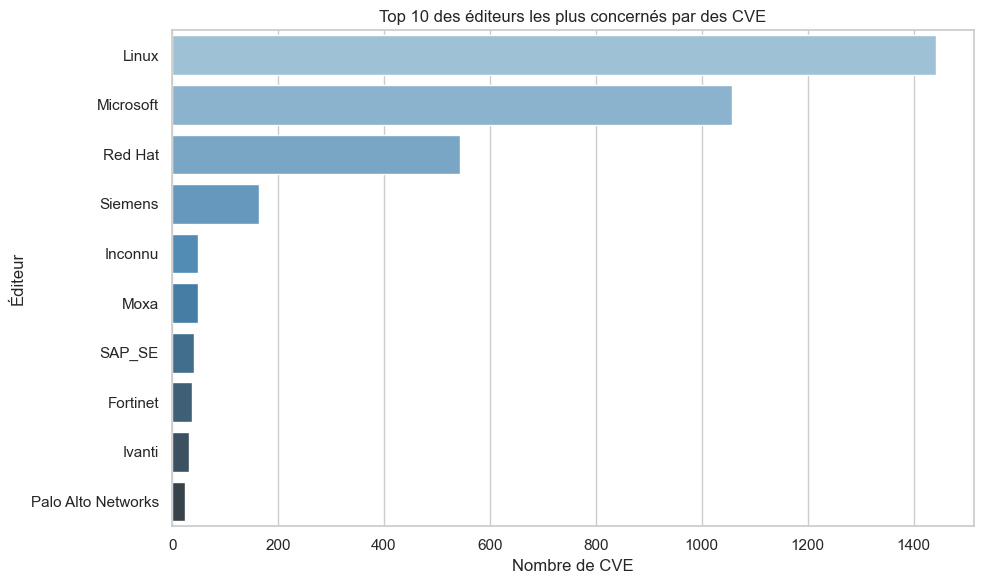

In [7]:
top_vendors = df["Éditeur/Vendor"].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_vendors.values, y=top_vendors.index, palette="Blues_d")
plt.title("Top 10 des éditeurs les plus concernés par des CVE")
plt.xlabel("Nombre de CVE")
plt.ylabel("Éditeur")
plt.tight_layout()
plt.show()


C:\Users\diaby\AppData\Local\Temp\ipykernel_27656\2903232277.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cwe.values, y=top_cwe.index, palette="Oranges_d")


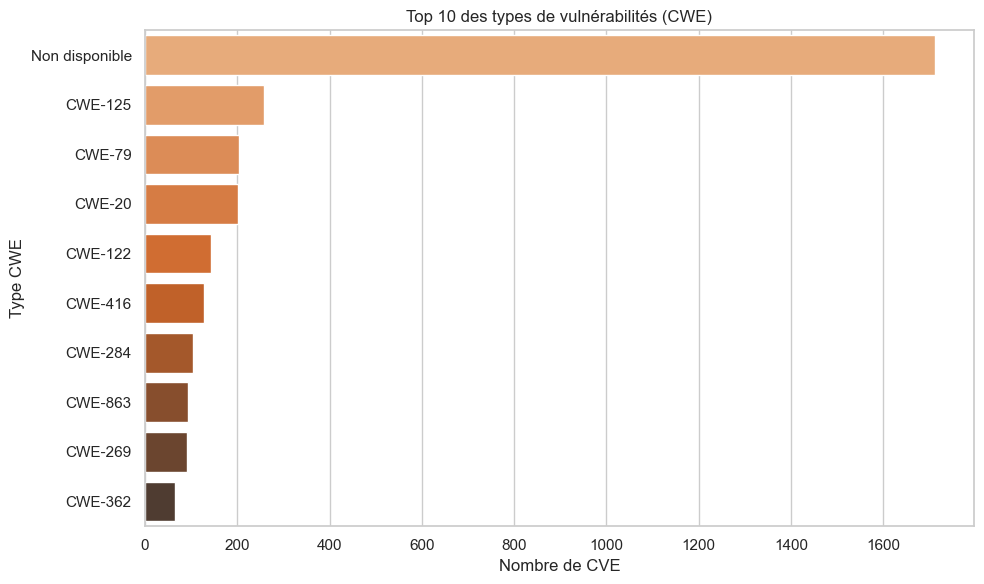

In [8]:
top_cwe = df["Type CWE"].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_cwe.values, y=top_cwe.index, palette="Oranges_d")
plt.title("Top 10 des types de vulnérabilités (CWE)")
plt.xlabel("Nombre de CVE")
plt.ylabel("Type CWE")
plt.tight_layout()
plt.show()


C:\Users\diaby\AppData\Local\Temp\ipykernel_27656\1815855680.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=severity_counts.index, y=severity_counts.values, palette="Reds")


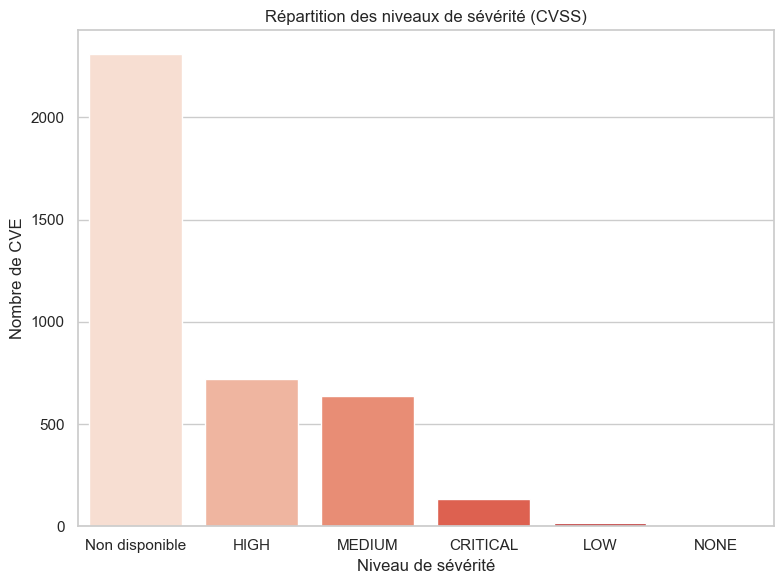

In [9]:
severity_counts = df["Base Severity"].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=severity_counts.index, y=severity_counts.values, palette="Reds")
plt.title("Répartition des niveaux de sévérité (CVSS)")
plt.xlabel("Niveau de sévérité")
plt.ylabel("Nombre de CVE")
plt.tight_layout()
plt.show()


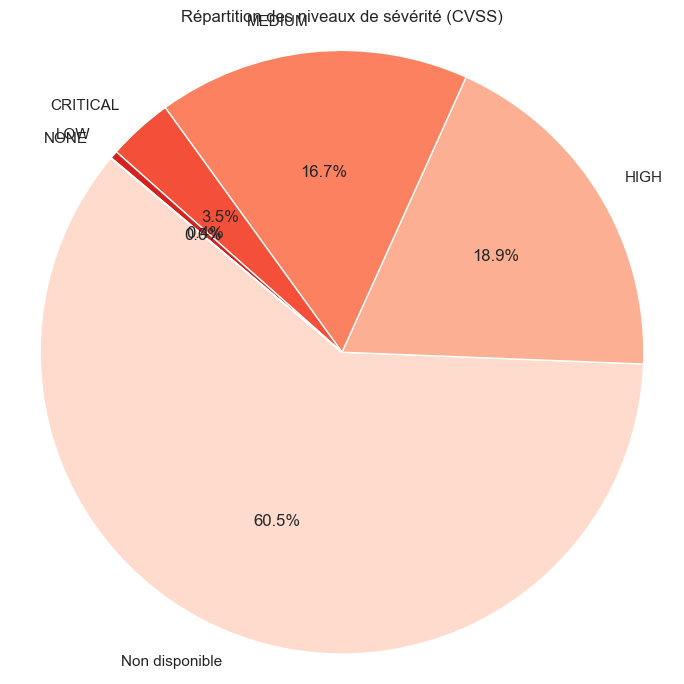

In [10]:
severity_counts = df["Base Severity"].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(
    severity_counts.values,
    labels=severity_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("Reds", len(severity_counts))
)
plt.title("Répartition des niveaux de sévérité (CVSS)")
plt.axis("equal")
plt.tight_layout()
plt.show()


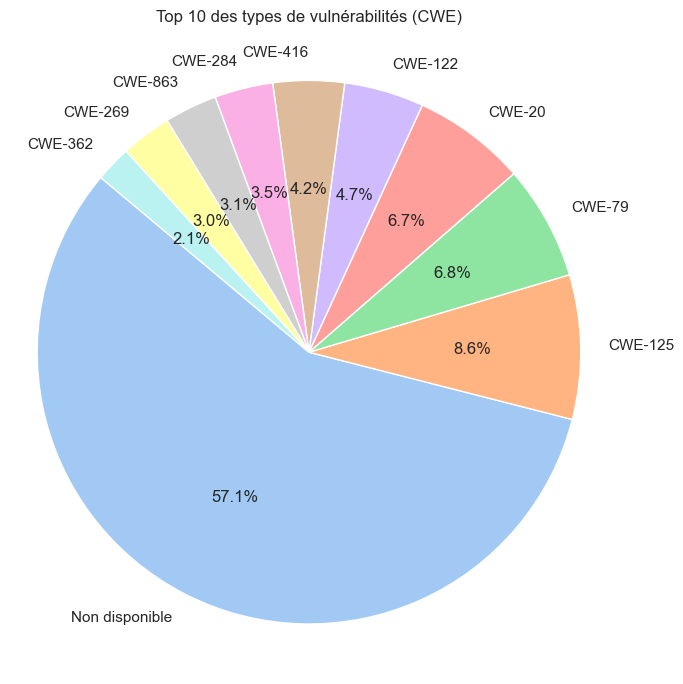

In [11]:
top_cwe = df["Type CWE"].value_counts().head(10)

plt.figure(figsize=(7, 7))
plt.pie(
    top_cwe.values,
    labels=top_cwe.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("pastel", len(top_cwe))
)
plt.title("Top 10 des types de vulnérabilités (CWE)")
plt.axis("equal")
plt.tight_layout()
plt.show()


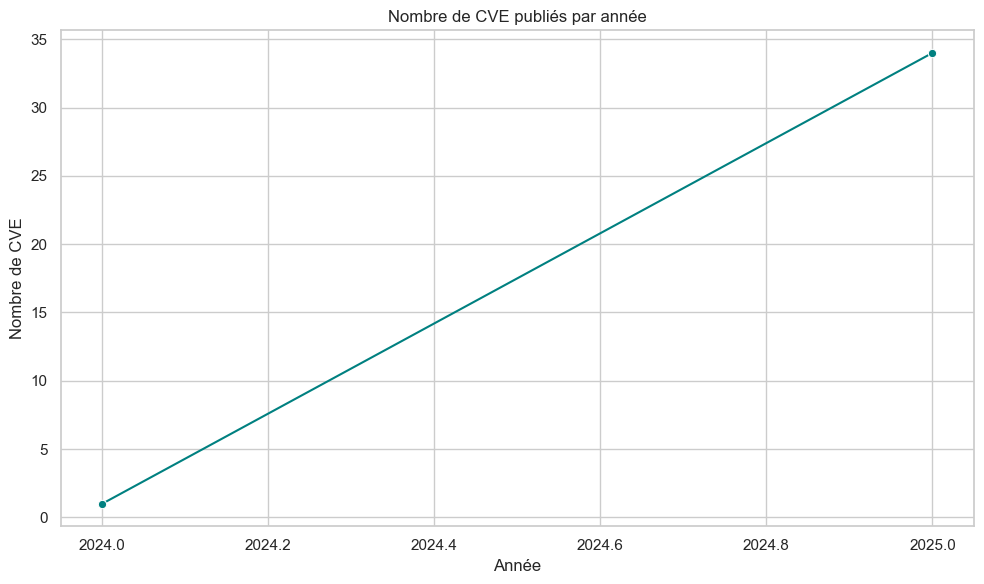

In [12]:
# Convertir la date en format datetime
df["Date de publication"] = pd.to_datetime(df["Date de publication"], errors='coerce')

# Extraire l'année
df["Année"] = df["Date de publication"].dt.year

# Compter le nombre de CVE par année
cve_par_annee = df["Année"].value_counts().sort_index()

# Tracer l'évolution annuelle
plt.figure(figsize=(10, 6))
sns.lineplot(x=cve_par_annee.index, y=cve_par_annee.values, marker="o", color="teal")
plt.title("Nombre de CVE publiés par année")
plt.xlabel("Année")
plt.ylabel("Nombre de CVE")
plt.grid(True)
plt.tight_layout()
plt.show()


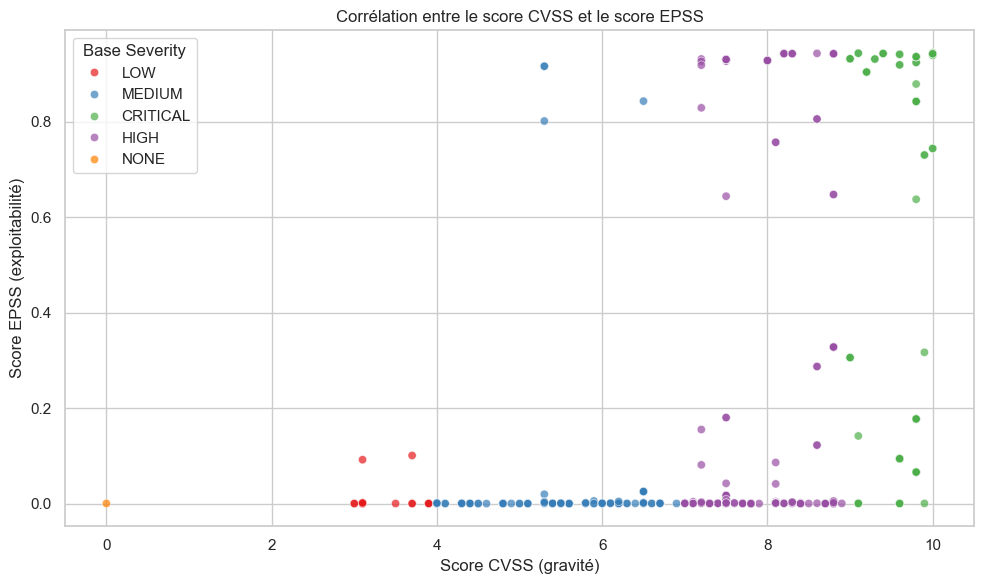

In [13]:
# On enlève les lignes où CVSS ou EPSS est manquant
df_corr = df.dropna(subset=["Score CVSS", "Score EPSS"])

# Tracer la corrélation
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_corr,
    x="Score CVSS",
    y="Score EPSS",
    hue="Base Severity",
    palette="Set1",
    alpha=0.7
)
plt.title("Corrélation entre le score CVSS et le score EPSS")
plt.xlabel("Score CVSS (gravité)")
plt.ylabel("Score EPSS (exploitabilité)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
# CVE critiques et très exploitables
cve_critiques = df[
    (df["Score CVSS"] >= 9.0) &
    (df["Score EPSS"] >= 0.7)
].sort_values(by=["Score CVSS", "Score EPSS"], ascending=False)

print("\n--- CVE critiques et très exploitables (CVSS ≥ 9 et EPSS ≥ 0.7) ---")
print(cve_critiques[[
    "Identifiant CVE", "Éditeur/Vendor", "Produit", "Score CVSS", "Score EPSS", "Type CWE"
]].head(10))



--- CVE critiques et très exploitables (CVSS ≥ 9 et EPSS ≥ 0.7) ---
     Identifiant CVE      Éditeur/Vendor  \
3721  CVE-2023-35078              Ivanti   
3720  CVE-2023-35082              Ivanti   
3752   CVE-2024-3400  Palo Alto Networks   
3753   CVE-2024-3400  Palo Alto Networks   
3754   CVE-2024-3400  Palo Alto Networks   
3728  CVE-2023-20198               Cisco   
3745   CVE-2023-7028              GitLab   
13    CVE-2025-31324              SAP_SE   
3810  CVE-2025-31324              SAP_SE   
27    CVE-2025-49113           Roundcube   

                                                Produit  Score CVSS  \
3721                            Endpoint Manager Mobile        10.0   
3720                                               EPMM        10.0   
3752                                             PAN-OS        10.0   
3753                                         Cloud NGFW        10.0   
3754                                      Prisma Access        10.0   
3728                

In [15]:
# Analyse : CVE critiques ET très exploitables
cve_critiques = df[
    (df["Score CVSS"] >= 9.0) &
    (df["Score EPSS"] >= 0.7)
].sort_values(by=["Score CVSS", "Score EPSS"], ascending=False)

print("\n--- CVE critiques et très exploitables (CVSS ≥ 9 et EPSS ≥ 0.7) ---")
cve_critiques[[
    "Identifiant CVE", "Éditeur/Vendor", "Produit", "Score CVSS", "Score EPSS", "Type CWE"
]].head(10)



--- CVE critiques et très exploitables (CVSS ≥ 9 et EPSS ≥ 0.7) ---


,Identifiant CVE,Éditeur/Vendor,Produit,Score CVSS,Score EPSS,Type CWE
3721,CVE-2023-35078,Ivanti,Endpoint Manager Mobile,10.0,0.94485,Non disponible
3720,CVE-2023-35082,Ivanti,EPMM,10.0,0.94468,Non disponible
3752,CVE-2024-3400,Palo Alto Networks,PAN-OS,10.0,0.94294,CWE-77
3753,CVE-2024-3400,Palo Alto Networks,Cloud NGFW,10.0,0.94294,CWE-77
3754,CVE-2024-3400,Palo Alto Networks,Prisma Access,10.0,0.94294,CWE-77
3728,CVE-2023-20198,Cisco,Cisco IOS XE Software,10.0,0.94190,CWE-420
3745,CVE-2023-7028,GitLab,GitLab,10.0,0.93941,CWE-640
13,CVE-2025-31324,SAP_SE,SAP NetWeaver (Visual Composer development ser...,10.0,0.74446,CWE-434
3810,CVE-2025-31324,SAP_SE,SAP NetWeaver (Visual Composer development ser...,10.0,0.74446,CWE-434
27,CVE-2025-49113,Roundcube,Webmail,9.9,0.73080,CWE-502


In [16]:
# Analyse : CVE à forte gravité mais peu exploitables
cve_sous_estimees = df[
    (df["Score CVSS"] >= 8.0) &
    (df["Score EPSS"] < 0.1)
].sort_values(by="Score CVSS", ascending=False)

print("\n--- CVE graves mais peu exploitables (CVSS ≥ 8 et EPSS < 0.1) ---")
cve_sous_estimees[[
    "Identifiant CVE", "Éditeur/Vendor", "Produit", "Score CVSS", "Score EPSS", "Type CWE"
]].head(10)



--- CVE graves mais peu exploitables (CVSS ≥ 8 et EPSS < 0.1) ---


,Identifiant CVE,Éditeur/Vendor,Produit,Score CVSS,Score EPSS,Type CWE
37,CVE-2025-20286,Cisco,Cisco Identity Services Engine Software,9.9,0.00051,CWE-259
3626,CVE-2022-34722,Microsoft,Windows Server 2016,9.8,0.06616,Non disponible
3624,CVE-2022-34722,Microsoft,Windows 10 Version 1507,9.8,0.06616,Non disponible
3632,CVE-2022-34722,Microsoft,Windows Server 2008 Service Pack 2 (Server Cor...,9.8,0.06616,Non disponible
3633,CVE-2022-34722,Microsoft,Windows Server 2008 Service Pack 2,9.8,0.06616,Non disponible
3634,CVE-2022-34722,Microsoft,Windows Server 2008 R2 Service Pack 1,9.8,0.06616,Non disponible
3635,CVE-2022-34722,Microsoft,Windows Server 2008 R2 Service Pack 1 (Server ...,9.8,0.06616,Non disponible
3629,CVE-2022-34722,Microsoft,Windows 7 Service Pack 1,9.8,0.06616,Non disponible
3628,CVE-2022-34722,Microsoft,Windows 7,9.8,0.06616,Non disponible
3636,CVE-2022-34722,Microsoft,Windows Server 2012,9.8,0.06616,Non disponible
